In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:

import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


In [9]:
#EX1
import torch

x = torch.tensor([1.0, 5.0], requires_grad=True)

# Apply the sigmoid function
sigmoid_x = torch.sigmoid(x)

sigmoid_x.backward(torch.ones_like(x))  # Compute gradients
autograd_grad = x.grad  # PyTorch computed gradient

# Compute gradient using explicit formula
explicit_grad = sigmoid_x * (1 - sigmoid_x)

print("PyTorch computed gradient:", autograd_grad)
print("Explicit formula gradient:", explicit_grad)

print("Are they equal?", torch.allclose(autograd_grad, explicit_grad))


PyTorch computed gradient: tensor([0.1966, 0.0066])
Explicit formula gradient: tensor([0.1966, 0.0066], grad_fn=<MulBackward0>)
Are they equal? True


In [10]:
#Ex2
import torch

x = torch.tensor([-2.3, 10.5], requires_grad=True)

linear_x = x 

linear_x.backward(torch.ones_like(x))  
autograd_grad = x.grad  

explicit_grad = torch.ones_like(x)  

print("PyTorch computed gradient:", autograd_grad)
print("Explicit formula gradient:", explicit_grad)

print("Are they equal?", torch.allclose(autograd_grad, explicit_grad))


PyTorch computed gradient: tensor([1., 1.])
Explicit formula gradient: tensor([1., 1.])
Are they equal? True


In [13]:
#Ex3
import torch

x = torch.tensor([1230.4, 231], requires_grad=True)
relu_x = torch.relu(x)
relu_x.backward(torch.ones_like(x))
autograd_grad = x.grad

explicit_grad = torch.where(x > 0, torch.tensor(1.0), torch.tensor(0.0)) #not differentiable in 0

print("PyTorch computed gradient:", autograd_grad)
print("Explicit formula gradient:", explicit_grad)
print("Are they equal?", torch.allclose(autograd_grad, explicit_grad))


PyTorch computed gradient: tensor([1., 1.])
Explicit formula gradient: tensor([1., 1.])
Are they equal? True


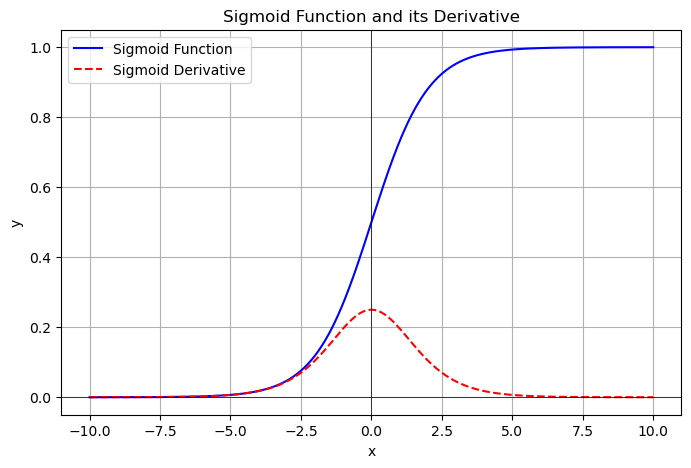

In [17]:
#Ex4
import torch
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def plot_sigmoid():
    x = np.linspace(-10, 10, 500)  # Generate values from -10 to 10
    y = sigmoid(x)  # Compute sigmoid values
    y_derivative = sigmoid_derivative(x)  # Compute sigmoid derivative values

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Sigmoid Function", color="blue")
    plt.plot(x, y_derivative, label="Sigmoid Derivative", color="red", linestyle="dashed")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.title("Sigmoid Function and its Derivative")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

plot_sigmoid()


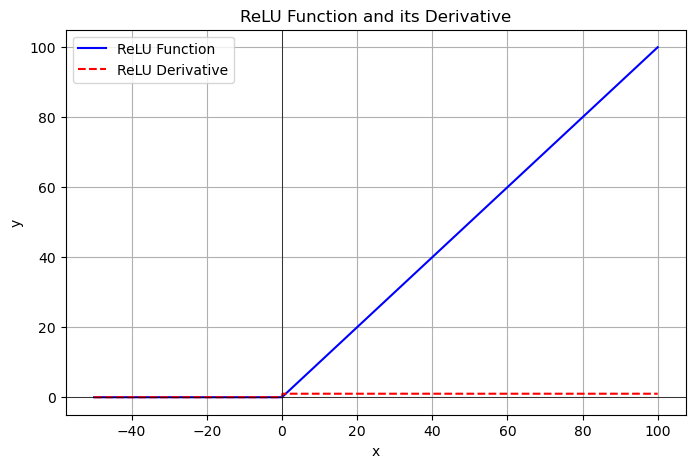

In [20]:
#Ex5
import torch
import numpy as np
import matplotlib.pyplot as plt

def ReLu(x):
    return np.maximum(0, x)

def ReLu_derivative(x):
    return np.where(x > 0, 1, 0)

def plot_relu():
    x = np.linspace(-50, 100, 1090)
    y = ReLu(x)
    y_derivative = ReLu_derivative(x)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="ReLU Function", color="blue")
    plt.plot(x, y_derivative, label="ReLU Derivative", color="red", linestyle="dashed")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.title("ReLU Function and its Derivative")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

plot_relu()


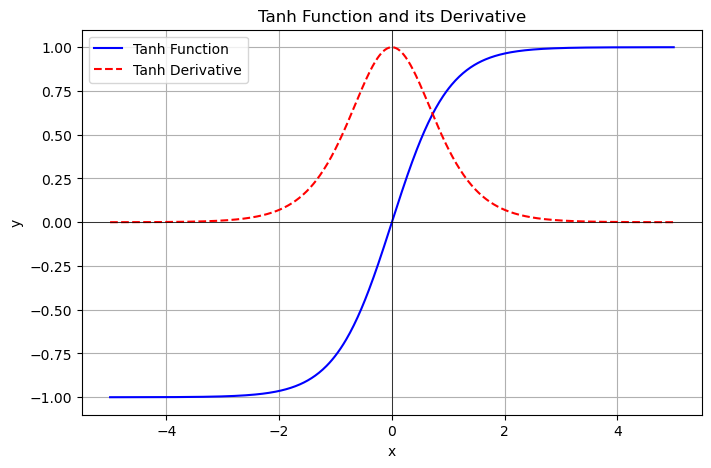

In [28]:
#Ex6
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def plot_tanh():
    x = np.linspace(-5, 5, 600) # cu cat am un interval mai mic, cu atat am o curba mai larga
    y = tanh(x)
    y_derivative = tanh_derivative(x)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Tanh Function", color="blue")
    plt.plot(x, y_derivative, label="Tanh Derivative", color="red", linestyle="dashed")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.title("Tanh Function and its Derivative")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

plot_tanh()


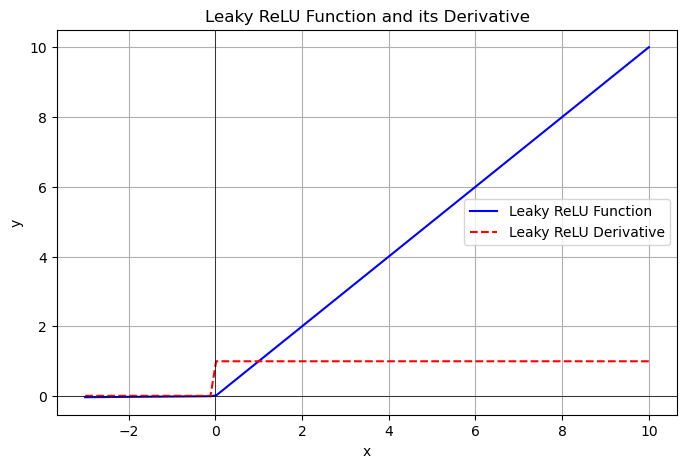

In [33]:
#Ex7
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def plot_leaky_relu(alpha=0.01):
    x = np.linspace(-3, 10, 100)  
    y = leaky_relu(x, alpha)  
    y_derivative = leaky_relu_derivative(x, alpha)  
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Leaky ReLU Function", color="blue")
    plt.plot(x, y_derivative, label="Leaky ReLU Derivative", color="red", linestyle="dashed")
    plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal axis
    plt.axvline(0, color='black', linewidth=0.5)  # Add vertical axis
    plt.legend()
    plt.title("Leaky ReLU Function and its Derivative")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

plot_leaky_relu()


In [34]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


In [35]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.3479], grad_fn=<SigmoidBackward0>)


In [36]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5323
Epoch [200/1000], Loss: 0.5013
Epoch [300/1000], Loss: 0.4906
Epoch [400/1000], Loss: 0.4861
Epoch [500/1000], Loss: 0.4839
Epoch [600/1000], Loss: 0.4828
Epoch [700/1000], Loss: 0.4822
Epoch [800/1000], Loss: 0.4819
Epoch [900/1000], Loss: 0.4817
Epoch [1000/1000], Loss: 0.4816


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


input_size = 2
output_size = 1

# Define training data for the OR logic gate
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x) #No activation function is applied in the forward pass because BCEWithLogitsLoss expects raw logits.

model = Perceptron(input_size, output_size)
loss_function = nn.BCEWithLogitsLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    output = model(X)
    loss = loss_function(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

with torch.no_grad():
    predictions = torch.sigmoid(model(X))
    predicted_labels = (predictions >= 0.5).float()
    accuracy = (predicted_labels == y).float().mean()
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')

    for i in range(len(X)):
        print(f"Input: {X[i].tolist()}, Predicted: {predicted_labels[i].item()}, Actual: {y[i].item()}")


Epoch 100, Loss: 0.3542
Epoch 200, Loss: 0.2748
Epoch 300, Loss: 0.2228
Epoch 400, Loss: 0.1864
Epoch 500, Loss: 0.1597
Epoch 600, Loss: 0.1393
Epoch 700, Loss: 0.1233
Epoch 800, Loss: 0.1104
Epoch 900, Loss: 0.0999
Epoch 1000, Loss: 0.0911
Accuracy: 100.00%
Input: [0.0, 0.0], Predicted: 0.0, Actual: 0.0
Input: [0.0, 1.0], Predicted: 1.0, Actual: 1.0
Input: [1.0, 0.0], Predicted: 1.0, Actual: 1.0
Input: [1.0, 1.0], Predicted: 1.0, Actual: 1.0
